a

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Numeric features:
Index(['CustomerID', 'Age', 'Ann

<>:11: SyntaxWarning: invalid escape sequence '\E'
<>:11: SyntaxWarning: invalid escape sequence '\E'
C:\Users\DR.ZAKERI\AppData\Local\Temp\ipykernel_13140\1026736617.py:11: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv("E:\Erfan\Fundamental intelligent systems\Final project\Mall_Customers.csv")


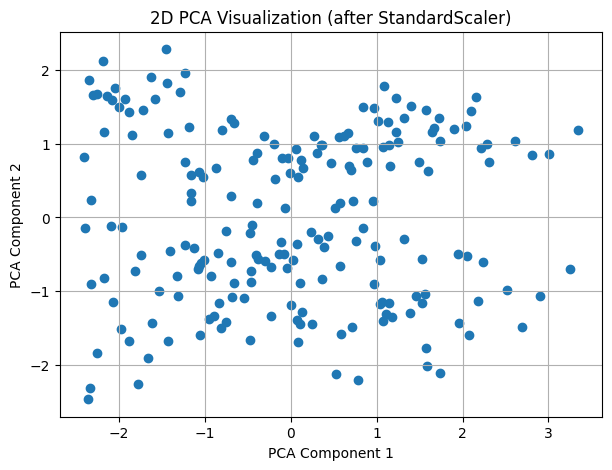

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ---------------------------
# 1) Load dataset
# ---------------------------
df = pd.read_csv("E:\Erfan\Fundamental intelligent systems\Final project\Mall_Customers.csv")  

print(df.head())
print(df.info())

# ---------------------------
# 2) انتخاب فقط ویژگی‌های عددی
# ---------------------------
numeric_df = df.select_dtypes(include=["int64", "float64"])
print("\nNumeric features:")
print(numeric_df.columns)

# ---------------------------
# 3) پاکسازی داده (در این دیتاست مقدار گمشده نداریم)
# ---------------------------
numeric_df = numeric_df.dropna()

# ---------------------------
# 4) Standard Scaling
# ---------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# ---------------------------
# 5) PCA دوبعدی فقط برای نمایش
# ---------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)

# ---------------------------
# 6) رسم فضای PCA
# ---------------------------
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA Visualization (after StandardScaler)")
plt.grid(True)
plt.show()


b

    K     Inertia  Silhouette
0   2  515.668889    0.318513
1   3  375.262711    0.336273
2   4  259.693626    0.414046
3   5  209.578384    0.427240
4   6  160.975676    0.439040
5   7  144.939607    0.417501
6   8  130.054351    0.399835
7   9  115.706085    0.378239
8  10  103.435365    0.390951


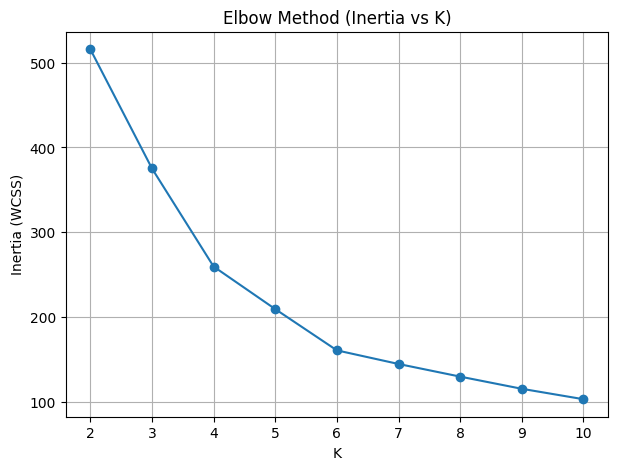

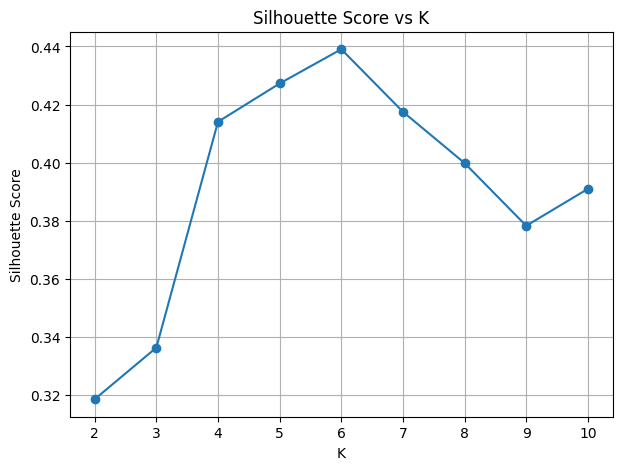


Best K by Silhouette: 6

Cluster counts:
Cluster
0    24
1    35
2    37
3    44
4    39
5    21
Name: count, dtype: int64


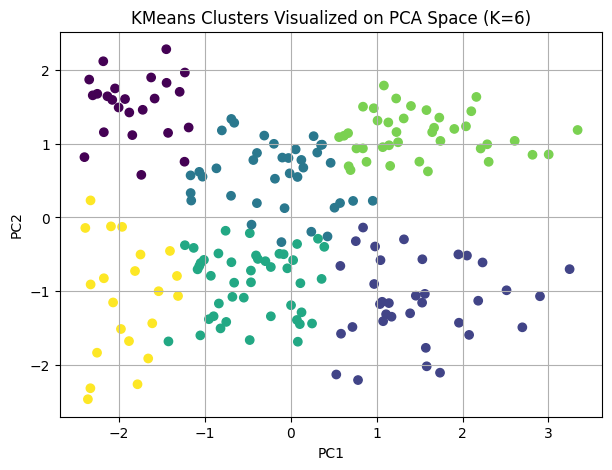

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ---------------------------
# 4) KMeans برای K = 2..10
# گزارش inertia و silhouette
# ---------------------------
Ks = range(2, 11)
inertias = []
sil_scores = []

for k in Ks:
    km = KMeans(n_clusters=k, random_state=73, n_init=10)
    labels = km.fit_predict(X_scaled)

    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

results = pd.DataFrame({
    "K": list(Ks),
    "Inertia": inertias,
    "Silhouette": sil_scores
})

print(results)

# ---------------------------
# 5) نمودارها برای تصمیم‌گیری K نهایی
# ---------------------------
plt.figure(figsize=(7,5))
plt.plot(results["K"], results["Inertia"], marker="o")
plt.xlabel("K")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method (Inertia vs K)")
plt.grid(True)
plt.show()

plt.figure(figsize=(7,5))
plt.plot(results["K"], results["Silhouette"], marker="o")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K")
plt.grid(True)
plt.show()

# ---------------------------
# 6) پیشنهاد K نهایی (بر اساس بیشترین silhouette)
# ---------------------------
best_k = results.loc[results["Silhouette"].idxmax(), "K"]
print("\nBest K by Silhouette:", int(best_k))

# ---------------------------
# 7) آموزش مدل نهایی با best_k و اضافه کردن برچسب خوشه
# ---------------------------
kmeans_final = KMeans(n_clusters=int(best_k), random_state=73, n_init=10)
df["Cluster"] = kmeans_final.fit_predict(X_scaled)

print("\nCluster counts:")
print(df["Cluster"].value_counts().sort_index())

# ---------------------------
# 8) نمایش خوشه‌ها روی فضای PCA (برای visualization)
# ---------------------------
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["Cluster"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"KMeans Clusters Visualized on PCA Space (K={int(best_k)})")
plt.grid(True)
plt.show()


     Linkage   K  Silhouette
0     single   2    0.244827
1     single   3    0.099202
2     single   4    0.016342
3     single   5   -0.021557
4     single   6   -0.045051
5     single   7   -0.128043
6     single   8   -0.144151
7     single   9   -0.155451
8     single  10   -0.154745
9   complete   2    0.316122
10  complete   3    0.325976
11  complete   4    0.405966
12  complete   5    0.371821
13  complete   6    0.391709
14  complete   7    0.418465
15  complete   8    0.388149
16  complete   9    0.392649
17  complete  10    0.363976
18   average   2    0.301056
19   average   3    0.333460
20   average   4    0.377352
21   average   5    0.401363
22   average   6    0.430195
23   average   7    0.420772
24   average   8    0.396524
25   average   9    0.381854
26   average  10    0.379090
27      ward   2    0.310764
28      ward   3    0.308747
29      ward   4    0.392313
30      ward   5    0.417867
31      ward   6    0.428330
32      ward   7    0.409927
33      ward  

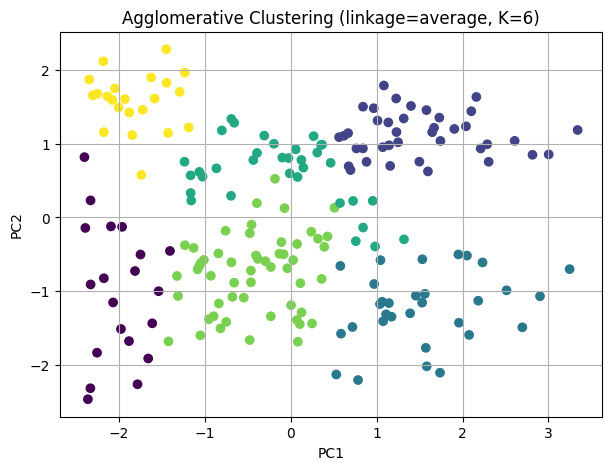

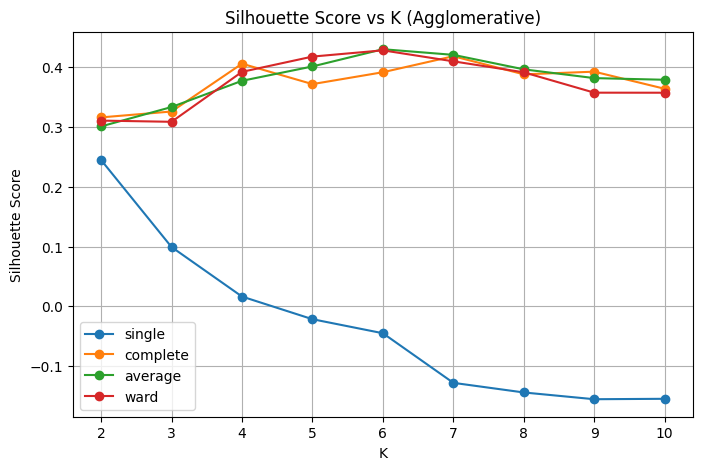

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# ---------------------------
# 4) Agglomerative Clustering
# ---------------------------
linkages = ["single", "complete", "average", "ward"]
Ks = range(2, 11)

results = []

for linkage in linkages:
    for k in Ks:
        # ward فقط با فاصله اقلیدسی کار می‌کند
        if linkage == "ward":
            model = AgglomerativeClustering(n_clusters=k, linkage="ward")
        else:
            model = AgglomerativeClustering(n_clusters=k, linkage=linkage)

        labels = model.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)

        results.append({
            "Linkage": linkage,
            "K": k,
            "Silhouette": score
        })

results_df = pd.DataFrame(results)
print(results_df)

# ---------------------------
# 5) بهترین K برای هر linkage
# ---------------------------
best_per_linkage = results_df.loc[
    results_df.groupby("Linkage")["Silhouette"].idxmax()
]

print("\nBest K per linkage:")
print(best_per_linkage)

# ---------------------------
# 6) انتخاب بهترین linkage نهایی
# ---------------------------
best_row = results_df.loc[results_df["Silhouette"].idxmax()]
best_linkage = best_row["Linkage"]
best_k = int(best_row["K"])

print("\nBest overall linkage:", best_linkage)
print("Best K:", best_k)
print("Best Silhouette:", best_row["Silhouette"])

# ---------------------------
# 7) آموزش مدل نهایی
# ---------------------------
final_model = AgglomerativeClustering(
    n_clusters=best_k,
    linkage=best_linkage
)
df["Cluster"] = final_model.fit_predict(X_scaled)

print("\nCluster counts:")
print(df["Cluster"].value_counts().sort_index())

# ---------------------------
# 8) PCA دوبعدی برای نمایش خوشه‌ها
# ---------------------------
pca = PCA(n_components=2, random_state=73)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["Cluster"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"Agglomerative Clustering (linkage={best_linkage}, K={best_k})")
plt.grid(True)
plt.show()

# ---------------------------
# 9) نمودار Silhouette برای هر linkage
# ---------------------------
plt.figure(figsize=(8,5))
for linkage in linkages:
    subset = results_df[results_df["Linkage"] == linkage]
    plt.plot(subset["K"], subset["Silhouette"], marker="o", label=linkage)

plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K (Agglomerative)")
plt.legend()
plt.grid(True)
plt.show()


d

    eps  min_samples  n_clusters  noise_ratio  silhouette_non_noise
0   0.2            3           4        0.935              0.858693
4   0.4            5           9        0.595              0.517699
8   0.6           10           5        0.460              0.512294
3   0.4            3          13        0.380              0.400744
7   0.6            5           7        0.190              0.378872
11  0.8           10           2        0.140              0.261384
6   0.6            3           5        0.090              0.225833
1   0.2            5           0        1.000                   NaN
2   0.2           10           0        1.000                   NaN
5   0.4           10           1        0.950                   NaN
9   0.8            3           1        0.015                   NaN
10  0.8            5           1        0.035                   NaN
12  1.0            3           1        0.010                   NaN
13  1.0            5           1        0.010   

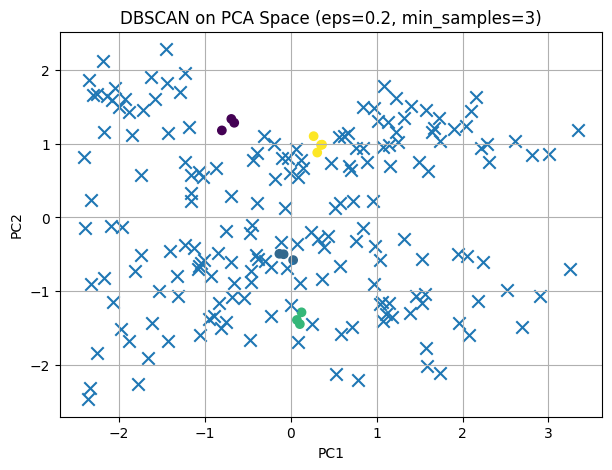


Label counts (including noise=-1):
-1    187
 0      3
 1      3
 2      3
 3      4
Name: count, dtype: int64


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# ---------------------------
# 4) Grid Search روی DBSCAN
# eps in {0.2,0.4,0.6,0.8,1.0}
# min_samples in {3,5,10}
# گزارش: تعداد خوشه‌ها، نسبت نویز، silhouette روی نقاط غیرنویز
# ---------------------------
eps_list = [0.2, 0.4, 0.6, 0.8, 1.0]
min_samples_list = [3, 5, 10]

rows = []

for eps in eps_list:
    for ms in min_samples_list:
        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(X_scaled)

        # نویز = -1
        noise_mask = (labels == -1)
        noise_ratio = noise_mask.mean()

        # تعداد خوشه‌ها (بدون نویز)
        unique_clusters = set(labels)
        n_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)

        # Silhouette فقط روی نقاط غیرنویز (اگر حداقل 2 خوشه داشته باشیم)
        non_noise_idx = ~noise_mask
        labels_non_noise = labels[non_noise_idx]
        X_non_noise = X_scaled[non_noise_idx]

        sil = np.nan
        if n_clusters >= 2:
            sil = silhouette_score(X_non_noise, labels_non_noise)

        rows.append({
            "eps": eps,
            "min_samples": ms,
            "n_clusters": n_clusters,
            "noise_ratio": noise_ratio,
            "silhouette_non_noise": sil
        })

results = pd.DataFrame(rows)
print(results.sort_values(by=["silhouette_non_noise"], ascending=False))

# ---------------------------
# 5) انتخاب بهترین تنظیم
# معیار پیشنهادی: بیشترین silhouette_non_noise
# (اگر NaN بود یعنی خوشه‌بندی معنی‌دار ایجاد نشده)
# ---------------------------
valid = results.dropna(subset=["silhouette_non_noise"]).copy()

if len(valid) == 0:
    print("\nNo configuration produced at least 2 clusters (silhouette undefined).")
    best_row = results.sort_values(by=["n_clusters", "noise_ratio"], ascending=[False, True]).iloc[0]
else:
    best_row = valid.sort_values(by=["silhouette_non_noise", "noise_ratio"], ascending=[False, True]).iloc[0]

best_eps = float(best_row["eps"])
best_ms = int(best_row["min_samples"])
print("\nBest config:")
print(best_row)

# ---------------------------
# 6) آموزش DBSCAN با بهترین تنظیم و نمایش
# ---------------------------
db_best = DBSCAN(eps=best_eps, min_samples=best_ms)
best_labels = db_best.fit_predict(X_scaled)

df["DBSCAN_Label"] = best_labels

# تعداد خوشه‌ها و نویز
noise_ratio = (best_labels == -1).mean()
unique_clusters = set(best_labels)
n_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)

print(f"\nFinal DBSCAN -> eps={best_eps}, min_samples={best_ms}")
print("Clusters:", n_clusters)
print("Noise ratio:", noise_ratio)

# Silhouette روی نقاط غیرنویز (اگر 2 خوشه یا بیشتر)
sil_final = np.nan
if n_clusters >= 2:
    mask = best_labels != -1
    sil_final = silhouette_score(X_scaled[mask], best_labels[mask])
print("Silhouette (non-noise):", sil_final)

# ---------------------------
# 7) Visualization روی PCA
# نویز را جدا نمایش می‌دهیم
# ---------------------------
plt.figure(figsize=(7, 5))
mask_noise = (best_labels == -1)
plt.scatter(X_pca[~mask_noise, 0], X_pca[~mask_noise, 1], c=best_labels[~mask_noise])
plt.scatter(X_pca[mask_noise, 0], X_pca[mask_noise, 1], marker="x", s=80)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"DBSCAN on PCA Space (eps={best_eps}, min_samples={best_ms})")
plt.grid(True)
plt.show()

# ---------------------------
# 8) شمارش برچسب‌ها
# ---------------------------
print("\nLabel counts (including noise=-1):")
print(pd.Series(best_labels).value_counts().sort_index())


h

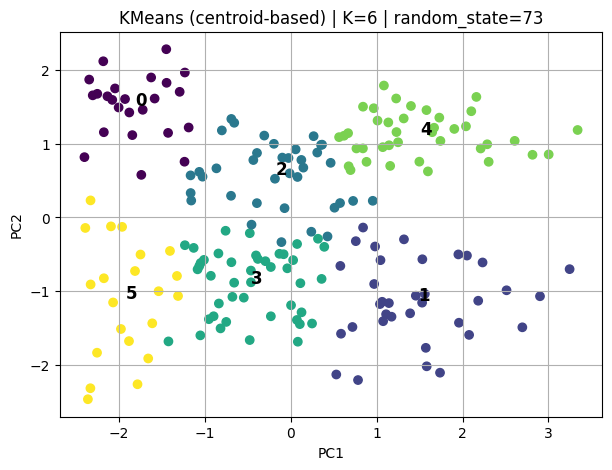

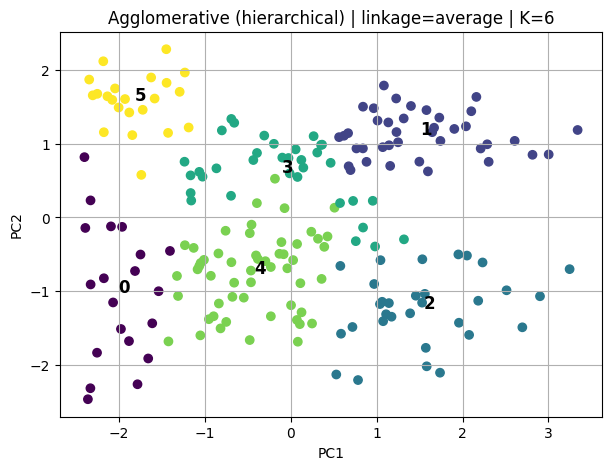

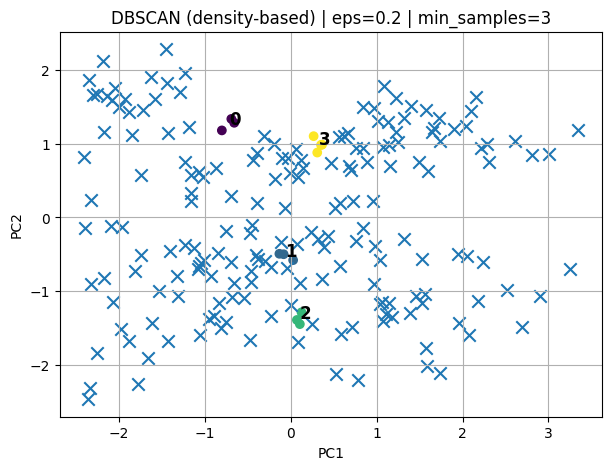


--- KMeans ---
n_clusters: 6
noise_ratio: 0.0
label counts:
0    24
1    35
2    37
3    44
4    39
5    21
Name: count, dtype: int64

--- Agglomerative ---
n_clusters: 6
noise_ratio: 0.0
label counts:
0    20
1    39
2    31
3    34
4    54
5    22
Name: count, dtype: int64

--- DBSCAN ---
n_clusters: 4
noise_ratio: 0.935
label counts:
-1    187
 0      3
 1      3
 2      3
 3      4
Name: count, dtype: int64


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN


RANDOM_STATE = 73

pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

# =========================================================
# 3) بهترین تنظیم‌ها (طبق نتایج قبلی)
# =========================================================
BEST_KMEANS_K = 6

BEST_AGG_LINKAGE = "average"
BEST_AGG_K = 6

BEST_DBSCAN_EPS = 0.2
BEST_DBSCAN_MIN_SAMPLES = 3

# =========================================================
# 4) مدل‌ها
# =========================================================
# (الف) KMeans — روش مرکزی
kmeans = KMeans(
    n_clusters=BEST_KMEANS_K,
    random_state=RANDOM_STATE,
    n_init=10
)
labels_km = kmeans.fit_predict(X_scaled)

# (ب) Agglomerative — روش سلسله‌مراتبی
agg = AgglomerativeClustering(
    n_clusters=BEST_AGG_K,
    linkage=BEST_AGG_LINKAGE
)
labels_agg = agg.fit_predict(X_scaled)

# (ج) DBSCAN — روش چگالی‌محور
db = DBSCAN(
    eps=BEST_DBSCAN_EPS,
    min_samples=BEST_DBSCAN_MIN_SAMPLES
)
labels_db = db.fit_predict(X_scaled)  # نویز = -1

# =========================================================
# 5) تابع رسم خوشه‌ها روی فضای PCA
# =========================================================
def plot_on_pca(X_pca, labels, title):
    plt.figure(figsize=(7, 5))

    if np.any(labels == -1):  # DBSCAN
        noise = labels == -1
        plt.scatter(X_pca[~noise, 0], X_pca[~noise, 1], c=labels[~noise])
        plt.scatter(X_pca[noise, 0], X_pca[noise, 1], marker="x", s=80)
    else:
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)

    # نوشتن شماره خوشه‌ها روی مرکز هر خوشه
    for c in set(labels):
        if c == -1:
            continue
        pts = X_pca[labels == c]
        cx, cy = pts.mean(axis=0)
        plt.text(cx, cy, str(c), fontsize=12, fontweight="bold")

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(title)
    plt.grid(True)
    plt.show()

# =========================================================
# 6) رسم نتایج
# =========================================================
plot_on_pca(
    X_pca,
    labels_km,
    f"KMeans (centroid-based) | K=6 | random_state=73"
)

plot_on_pca(
    X_pca,
    labels_agg,
    f"Agglomerative (hierarchical) | linkage=average | K=6"
)

plot_on_pca(
    X_pca,
    labels_db,
    f"DBSCAN (density-based) | eps=0.2 | min_samples=3"
)

# =========================================================
# 7) خلاصه آماری برای تحلیل
# =========================================================
def summarize(labels, name):
    uniq = set(labels)
    n_clusters = len(uniq) - (1 if -1 in uniq else 0)
    noise_ratio = (labels == -1).mean() if -1 in uniq else 0.0

    print(f"\n--- {name} ---")
    print("n_clusters:", n_clusters)
    print("noise_ratio:", noise_ratio)
    print("label counts:")
    print(pd.Series(labels).value_counts().sort_index())

summarize(labels_km, "KMeans")
summarize(labels_agg, "Agglomerative")
summarize(labels_db, "DBSCAN")


h

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN


RANDOM_STATE = 73

pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# =========================================================
# 3) بهترین تنظیم‌ها (طبق نتایج قبلی)
# =========================================================
BEST_KMEANS_K = 6

BEST_AGG_LINKAGE = "average"
BEST_AGG_K = 6

BEST_DBSCAN_EPS = 0.2
BEST_DBSCAN_MIN_SAMPLES = 3

# =========================================================
# 4) مدل‌ها
# =========================================================
# (الف) KMeans — روش مرکزی
kmeans = KMeans(
    n_clusters=BEST_KMEANS_K,
    random_state=RANDOM_STATE,
    n_init=10
)
labels_km = kmeans.fit_predict(X_scaled)

# (ب) Agglomerative — روش سلسله‌مراتبی
agg = AgglomerativeClustering(
    n_clusters=BEST_AGG_K,
    linkage=BEST_AGG_LINKAGE
)
labels_agg = agg.fit_predict(X_scaled)

# (ج) DBSCAN — روش چگالی‌محور
db = DBSCAN(
    eps=BEST_DBSCAN_EPS,
    min_samples=BEST_DBSCAN_MIN_SAMPLES
)
labels_db = db.fit_predict(X_scaled)  # نویز = -1

# =========================================================
# 5) تابع رسم خوشه‌ها روی فضای PCA
# =========================================================
def plot_on_pca(X_pca, labels, title):
    plt.figure(figsize=(7, 5))

    if np.any(labels == -1):  # DBSCAN
        noise = labels == -1
        plt.scatter(X_pca[~noise, 0], X_pca[~noise, 1], c=labels[~noise])
        plt.scatter(X_pca[noise, 0], X_pca[noise, 1], marker="x", s=80)
    else:
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)

    # نوشتن شماره خوشه‌ها روی مرکز هر خوشه
    for c in set(labels):
        if c == -1:
            continue
        pts = X_pca[labels == c]
        cx, cy = pts.mean(axis=0)
        plt.text(cx, cy, str(c), fontsize=12, fontweight="bold")

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(title)
    plt.grid(True)
    plt.show()

# =========================================================
# 6) رسم نتایج
# =========================================================
plot_on_pca(
    X_pca,
    labels_km,
    f"KMeans (centroid-based) | K=6 | random_state=73"
)

plot_on_pca(
    X_pca,
    labels_agg,
    f"Agglomerative (hierarchical) | linkage=average | K=6"
)

plot_on_pca(
    X_pca,
    labels_db,
    f"DBSCAN (density-based) | eps=0.2 | min_samples=3"
)

# =========================================================
# 7) خلاصه آماری برای تحلیل
# =========================================================
def summarize(labels, name):
    uniq = set(labels)
    n_clusters = len(uniq) - (1 if -1 in uniq else 0)
    noise_ratio = (labels == -1).mean() if -1 in uniq else 0.0

    print(f"\n--- {name} ---")
    print("n_clusters:", n_clusters)
    print("noise_ratio:", noise_ratio)
    print("label counts:")
    print(pd.Series(labels).value_counts().sort_index())

summarize(labels_km, "KMeans")
summarize(labels_agg, "Agglomerative")
summarize(labels_db, "DBSCAN")
